Error message: PetImages/Cat/11874.jpg
Error message: PetImages/Cat/9565.jpg
Error message: PetImages/Cat/850.jpg
Error message: PetImages/Dog/2688.jpg
Error message: PetImages/Cat/8470.jpg
Error message: PetImages/Dog/2877.jpg
Error message: PetImages/Dog/9188.jpg
Error message: PetImages/Cat/11565.jpg
Error message: PetImages/Dog/8730.jpg
Error message: PetImages/Dog/1866.jpg
Error message: PetImages/Cat/10404.jpg
Error message: PetImages/Dog/6238.jpg
Error message: PetImages/Dog/1308.jpg
Error message: PetImages/Dog/10401.jpg
(4986, 48, 48, 3)
(4986,)
Error message: PetImages/Cat/7968.jpg
Error message: PetImages/Dog/4367.jpg
Error message: PetImages/Dog/5736.jpg
(497, 48, 48, 3)
(497,)
Saving to dogs_cats.pkl
train張數: 4986
(48, 48, 3)
test張數: 497
(48, 48, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 6912)              0         
       

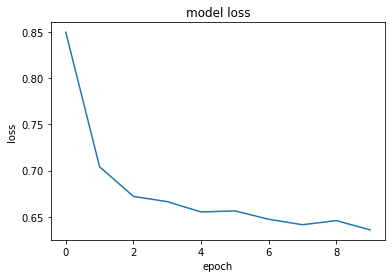

16/16 [==============================] - 0s 7ms/step - loss: 0.6623 - accuracy: 0.6097
test_acc= 0.6096579432487488
test_loss= 0.6622511744499207
156/156 [==============================] - 1s 8ms/step - loss: 0.6056 - accuracy: 0.6673
train_acc= 0.6672683358192444
Epoch 1/10
156/156 [==============================] - 2s 9ms/step - loss: 1.5091 - accuracy: 0.5094
Epoch 2/10
156/156 [==============================] - 2s 12ms/step - loss: 0.3344 - accuracy: 0.5359
Epoch 3/10
156/156 [==============================] - 2s 11ms/step - loss: 0.3163 - accuracy: 0.5305
Epoch 4/10
156/156 [==============================] - 1s 8ms/step - loss: 0.2739 - accuracy: 0.5808
Epoch 5/10
156/156 [==============================] - 1s 8ms/step - loss: 0.2814 - accuracy: 0.5574
Epoch 6/10
156/156 [==============================] - 1s 7ms/step - loss: 0.2650 - accuracy: 0.5788
Epoch 7/10
156/156 [==============================] - 1s 7ms/step - loss: 0.2607 - accuracy: 0.5846
Epoch 8/10
156/156 [=============

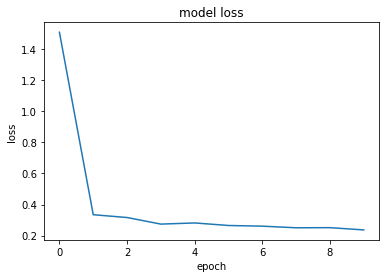

16/16 [==============================] - 0s 5ms/step
(497,)
497
test_accurancy: 0.5613682092555332


In [2]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

def get_data_from_file(train_file):
  # enter your code here
  train_data = []
  with open(train_file) as fp:
    for line in fp:
    #obtain img_path from line
      #print(line)
      img_path = str.strip(data_dir+'/'+line)
      #print(img_path)
      try:
        img = cv2.imread(img_path)
        img_resized = cv2.resize(img, (48, 48))
        if 'Cat' in line:
          label = 0
        if 'Dog' in line: 
          label = 1
        train_data.append([img_resized, label])
      except:
        #print error message
        print('Error message:',img_path)
  return train_data
  
  

def get_image_and_label(train_data):
  # enter your code here
  X_train = []
  Y_train = []
  for k in range(len(train_data)):
    X_train.append(train_data[k][0])
    Y_train.append(train_data[k][1])
  X_train = np.array(X_train)
  Y_train = np.array(Y_train)

  print(X_train.shape)
  print(Y_train.shape)
  return X_train,Y_train



def assignment3b_1():
  train_file = 'train_list.txt'
  test_file = 'test_list.txt'
  # enter your code here
  train_data = get_data_from_file(train_file)
  X_train, Y_train = get_image_and_label(train_data)
  test_data = get_data_from_file(test_file)
  X_test, Y_test = get_image_and_label(test_data)

  save_path = 'dogs_cats.pkl'
  print('Saving to', save_path)
  data = {}
  data['X_train'] = X_train
  data['Y_train'] = Y_train
  data['X_test'] = X_test
  data['Y_test'] = Y_test
  pickle.dump(data, open(save_path, 'wb'))

  print('train張數:',len(train_data))
  print(train_data[1][0].shape)
  
  print('test張數:',len(test_data))
  print(test_data[1][0].shape)


def build_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48,48,3)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
  ])
  return model  #不確定

def assignment3b_2():
  data = pickle.load(open("dogs_cats.pkl","rb"))
  X_train, Y_train, X_test, Y_test = data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]
  X_train = X_train / 255.0
  X_test = X_test / 255.0
  # enter your code here
  model = build_model()
  model.summary()
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) 
  history = model.fit(X_train, Y_train,batch_size=32, epochs=10,verbose=1)
  plt.plot(history.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()

  test_loss, test_acc = model.evaluate(X_test, Y_test)
  print('test_acc=',test_acc)
  print('test_loss=',test_loss)

  train_loos, train_acc = model.evaluate(X_train, Y_train)
  print('train_acc=',train_acc)
  #print('train_loss=',train_loss) train_loss沒有被定義

  


def assignment3b_3():
  data = pickle.load(open("dogs_cats.pkl","rb"))
  X_train, Y_train, X_test, Y_test = data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]
  X_train = X_train / 255.0
  X_test = X_test / 255.0
  # enter your code here

  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48,48,3)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(1, activation="linear")
  ])
  

  model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
  history = model.fit(X_train, Y_train,batch_size=32, epochs=10,verbose=1)
  plt.plot(history.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()

  prediction=[]
  reg = model.predict(X_test).squeeze()
  print(reg.shape)
  print(len(reg))

  for i in range(len(reg)):
    if round(reg[i]) == 0:
      prediction.append(0)
    elif round(reg[i]) == 1:
      prediction.append(1)
  predictions = np.array(prediction)
    
  cor = np.sum(predictions==Y_test)
  acc = cor/len(reg)
  print("test_accurancy:",acc)




data_dir = 'PetImages'
img_size = 48

if __name__ == '__main__':
    assignment3b_1()
    assignment3b_2()
    assignment3b_3()

In [2]:
# Question 3b-2
# The test accuracy is much lower than the training accuracy. Why?
# How can we improve the test accuracy?
# Write down your answer here

#模型是以train_data訓練而得，所以依據訓練的model所測試的accurcy一定是訓練集較高。
#可調整model.fit()內的參數，或是調整loss function，來增加準確率。




In [3]:
# Question 3b-3
# Compare the test accuracy of mean_squared_error to that of sparse_categorical_crossentropy. Which one is better? Why?
# Write down your answer here.

#對於此資料集可以看出sparse_categorical_crossentropy相對於mean_squared_error精準度是較高的，但兩種方法應該皆有各自的好處
# mean_squared_errorc會將錯誤真正確的預測值做平均，減小錯誤產生的影響，sparse_categorical_crossentropy錯誤時則會相較於mean_squared_errorc有比較大的影響。